In [1]:
import collections
import os
import math

import pandas as pd
from sklearn import preprocessing
import numpy as np

import json
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import random
from collections import Counter

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv("C:\\Users\\giuli\\Desktop\\new ds\\merged\\mergedFile.csv")
df_clusters = pd.read_json('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\col_heat_base.json')

df_clusters

,View,1_clusters,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,,0,0,1,0,0,2,2,7,5,...,0,15,17,15,9,10,4,20,4,17
1,a,0,1,2,2,3,4,4,5,2,...,3,11,9,6,1,1,9,8,25,25
2,b,0,0,1,0,0,2,2,0,3,...,9,6,19,19,2,8,12,13,15,1
3,c,0,0,1,3,1,5,1,4,6,...,6,8,3,1,8,6,22,22,20,11
4,d,0,1,0,1,2,0,0,3,1,...,1,9,1,4,4,9,2,0,5,0
5,e,0,1,0,1,2,0,0,3,8,...,7,1,0,8,10,3,18,17,3,14
6,f,0,0,0,3,1,3,5,1,0,...,2,2,16,3,16,15,0,12,0,5
7,g,0,0,1,3,1,5,1,4,6,...,6,8,3,1,8,22,11,10,13,8
8,h,0,0,1,0,0,2,2,0,3,...,8,16,5,5,5,7,7,9,6,23
9,i,0,0,1,0,0,2,2,0,3,...,8,16,5,5,5,7,7,24,24,2


In [3]:
df_labels = pd.read_json('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\labels_clusters.json')


df_labels

,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,10_clusters,11_clusters,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,1,2,2,3,4,4,5,2,6,6,...,3,11,9,6,1,1,9,8,1,22
1,0,1,0,0,2,2,0,3,2,10,...,8,16,5,5,5,7,7,9,6,23
2,1,2,2,3,4,4,5,2,6,6,...,3,11,9,6,1,1,9,8,25,25
3,0,0,3,1,3,5,1,0,3,2,...,2,18,15,18,18,18,3,3,16,13
4,0,1,0,0,2,2,7,5,5,5,...,0,15,17,15,9,10,4,20,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25620,1,2,2,3,4,4,5,2,6,6,...,3,11,9,6,1,1,9,8,25,25
25621,0,1,0,4,1,3,2,4,0,8,...,5,7,4,14,3,13,1,21,21,20
25622,0,1,0,0,2,2,0,3,2,10,...,8,16,5,5,5,7,7,24,24,2
25623,0,0,3,1,3,5,1,0,3,2,...,2,18,15,18,18,18,3,3,16,13


In [4]:
def load_words():
    with open('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\words_alpha.txt') as word_file:
        valid_words = set(word_file.read().split())
    return valid_words

dictionary = load_words()
print('fatality' in dictionary)

df

True


,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin,View,User,Hand,Smartphone
0,-0.955980,-1.098000,0.909562,0.827302,0.271050,-2.202000,2.796702,2.635050,0.343638,0.118087,...,1.0,1.0,0.0,0.0,1.0,1.0,w,Biagio,RIGHT,REALME 7
1,0.582750,0.504000,0.497610,0.247616,1.228950,-0.115950,1.239209,1.243950,0.195806,0.038340,...,1.0,1.0,0.0,0.0,1.0,1.0,h,Biagio,RIGHT,REALME 7
2,-1.665956,-1.339950,0.780396,0.609017,-0.553950,-2.503950,2.015613,2.050950,0.320559,0.102758,...,1.0,1.0,0.0,0.0,1.0,1.0,a,Biagio,RIGHT,REALME 7
3,-0.068662,-0.181500,0.477223,0.227742,0.640050,-0.667050,1.617863,1.508550,0.337742,0.114069,...,1.0,1.0,0.0,0.0,1.0,1.0,t,Biagio,RIGHT,REALME 7
4,0.099825,0.120000,0.297081,0.088257,0.504000,-0.463050,1.194500,1.156500,0.209884,0.044051,...,1.0,1.0,0.0,0.0,1.0,1.0,,Biagio,RIGHT,REALME 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25620,-1.753162,-1.707077,0.092171,0.008495,-1.707077,-1.891418,1.075600,1.108521,0.065842,0.004335,...,1.0,1.0,0.0,0.0,1.0,1.0,a,Giulio,RIGHT,ASUS ZENFONE 3
25621,1.156399,1.051056,0.210686,0.044388,1.472427,1.051056,0.071224,0.093369,0.044289,0.001961,...,1.0,1.0,0.0,0.0,1.0,1.0,l,Giulio,RIGHT,ASUS ZENFONE 3
25622,-0.220276,-0.220276,0.000000,0.000000,-0.220276,-0.220276,0.876282,0.876282,0.000000,0.000000,...,1.0,1.0,0.0,0.0,1.0,1.0,i,Giulio,RIGHT,ASUS ZENFONE 3
25623,-0.143650,-0.095764,0.095772,0.009172,-0.095764,-0.287308,0.764942,0.735016,0.059853,0.003582,...,1.0,1.0,0.0,0.0,1.0,1.0,t,Giulio,RIGHT,ASUS ZENFONE 3


In [5]:
sentences = []
long_sentences = []
num_words = 0

# get sentences of app from file
with open('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\TestSentences.txt') as sentence_file:
        # valid_words = set(sentence_file.read().split())
        # print(valid_words)
        for line in sentence_file:
            # rstrip() rimuove \n alla fine della frase
            long_sentences.append(line.rstrip())
            line_splitted = line.split()
            num_words += len(line_splitted)
            for l in line_splitted:
                sentences.append(l)

sentences_not_duplicates = list(set(sentences))

print(sentences_not_duplicates)
print("len(sentences_not_duplicates)", len(sentences_not_duplicates))

print("long_sentences", long_sentences)
print("len long_sentences", len(long_sentences))

['found', 'exclamation', 'jack', 'having', 'comfortable', 'out', 'working', 'over', 'give', 'when', 'station', 'others', 'joined', 'sold', 'absolutely', 'quiz', 'beet', 'if', 'amazed', 'easy', 'ear', 'loud', 'phone', 'video', 'fine', 'happy', 'plan', 'while', 'jet', 'quickly', 'of', 'for', 'pad', 'this', 'up', 'sharing', 'squad', 'than', 'squabbled', 'amazingly', 'extended', 'me', 'musical', 'app', 'set', 'lit', 'surprised', 'it', 'john', 'going', 'from', 'about', 'being', 'will', 'just', 'quick', 'expect', 'car', 'fun', 'had', 'hard', 'arrival', 'with', 'have', 'prof', 'great', 'take', 'session', 'how', 'went', 'impressed', 'gets', 'the', 'drop', 'brown', 'time', 'back', 'is', 'quinoa', 'then', 'make', 'math', 'his', 'jumps', 'what', 'arrived', 'fox', 'inexpensive', 'was', 'jeff', 'poor', 'excellent', 'jazz', 'sound', 'books', 'frequently', 'expensive', 'joint', 'very', 'laziness', 'locked', 'docking', 'my', 'job', 'can', 'a', 'big', 'use', 'key', 'clips', 'nice', 'jacques', 'or', 'wh

In [6]:
df_word = df
print(len(df_word))

# split dataset
def get_index_split():
    #indice per splittare in due il df
    train_df_split_len = int((2 * len(df_word))/3) #17.083
    view_row_train = df_word.iloc[train_df_split_len]['View']
    print("indice prima", train_df_split_len, view_row_train)
    true_train_split = 0
    if view_row_train != ' ':
        for index, row in df_word.iterrows():
            if index >= train_df_split_len:
                if row['View'] == ' ':
                    true_train_split = index

            if true_train_split != 0:
                break
    else:
        true_train_split = train_df_split_len

    print("indice dopo", true_train_split)
    return true_train_split

25625


In [7]:
# divide in train and test set
def train_test_fun():
    true_train_split = get_index_split()
    train_df = df_word.iloc[:true_train_split, :]
    test_df = df_word.iloc[true_train_split:, :]

    test_df_index = test_df.reset_index(drop=True)
    return train_df, test_df_index

In [9]:
# get rows by consecutive letters
def index_slice_by_substring(full_string, substring) -> tuple:
    len_substring = len(substring)
    len_full_string = len(full_string)
    for x0, x1 in enumerate(range(len_substring, len_full_string+1)):
        if full_string[x0:x1] == substring:
            return (x0,x1)

def rows_by_consecutive_letters(dframe, column, condition) -> pd.DataFrame:
    try:
        row_begin, row_end = index_slice_by_substring(''.join(dframe[column]), condition)
        return dframe.iloc[row_begin:row_end,:]
    except:
        print("except", condition)


In [10]:
# get rows of all sentences
def get_sentences_df():

    train_df, test_df_index = train_test_fun()

    df_join = ''.join(test_df_index["View"])
    len_full_string = len(df_join)
    # print(df_join)
    # print(len_full_string)
    map_of_sentences = collections.defaultdict(list)
    for s in long_sentences:
        len_substring = len(s)
        for row_begin, row_end in enumerate(range(len_substring, len_full_string)):

            if df_join[row_begin:row_end] == s:
                # print((row_begin,row_end))
                # print(df_join[row_begin:row_end])
                if s in map_of_sentences.keys():
                    map_of_sentences[s].append(test_df_index.iloc[row_begin:row_end,:])
                else:
                    map_of_sentences[s] = []
                    map_of_sentences[s].append(test_df_index.iloc[row_begin:row_end,:])


    return map_of_sentences

In [11]:
# get rows from previous dict
def get_words_df():
    map_of_sentences = get_sentences_df()
    map_of_words = collections.defaultdict(list)

    for ind in range(len(sentences_not_duplicates)):
        map_of_words[sentences_not_duplicates[ind]] = []

    for key_map in map_of_sentences:
        # print(type(map_of_sentences[key_map]))
        list_key_splitted = key_map.split()
        # print(list_key_splitted)
        for values in map_of_sentences[key_map]:
            # print(values)
            for p in  list_key_splitted:

                df_word_returned = rows_by_consecutive_letters(values,"View",p)
                df_word_returned = df_word_returned.iloc[:, :-3]
                # print(df_word_returned)
                df_word_returned = df_word_returned.reset_index(drop=True)
                # print(df_word_returned)
                map_of_words[p].append(df_word_returned)

    return map_of_words

In [12]:
# calculate mean of each words
def mean_of_words():
    map_of_words = get_words_df()
    map_mean = collections.defaultdict(list)

    list_of_dataframes = []

    for key_map in map_of_words:

        if len(map_of_words[key_map]) != 0:
            # concatena tutti i dataframe all'interno di ogni lista
            df_word_mean = pd.concat(map_of_words[key_map])
            # print(df_word_mean)
            view_column = df_word_mean[["View"]]
            #prende la prima occorrenza della View
            view_to_append = view_column.head(len(key_map))
            # raggruppa per indice
            mean_row_index = df_word_mean.groupby(df_word_mean.index)
            # calcola la media
            mean_value_correct = mean_row_index.mean()
            # inserisce di nuovo la View
            mean_value_correct.insert(len(mean_value_correct.columns), "View", view_to_append)
            # print(mean_value_correct)

            list_of_dataframes.append(mean_value_correct)
        # else:
        #     print(key_map)


    return list_of_dataframes

In [6]:
# Leave One Out Cross Validation for word 'app'
def leave_one_out_cv_test():
    df_word2 = df
    keep = []
    for i in range(len(df) - 2):
        if (df.View[i]=='a') & (df.View[i+1] =='p') & (df.View[i+2] =='p'):
            keep.append(i)
            keep.append(i+1)
            keep.append(i+2)

    if len(keep) == 0:
        print("non è in test set")

    df_word2_app = df_word2.iloc[keep]
    df_word2_app = df_word2_app.iloc[:3]
    indexes_to_del = []
    for i in range(len(df_word2_app)):
        print(df_word2_app.index[i])
        indexes_to_del.append(df_word2_app.index[i])

    df_word2 = df_word2.drop(indexes_to_del)

    index_space2 = df_word2[ df_word2['View'] == ' ' ].index
    df_word2.drop(index_space2, inplace=True)

    X_word2_app = df_word2_app.drop(['View','User','Hand', 'Smartphone'], axis=1)
    X_word2_app = np.array(X_word2_app)

    y_word2_app = np.array(df_word2_app['View'])

    features2 = df_word2.drop(['View','User','Hand', 'Smartphone'], axis=1)

    labels2 = np.array(df_word2['View'])
    features2 = np.array(features2)

    return X_word2_app, y_word2_app, features2, labels2

In [13]:
# train model
def fit_model():
    train_df, test_df_index = train_test_fun()
    model = RandomForestClassifier(n_estimators = 100, random_state = 42)
    # model = SVC(C=1.0, kernel='linear', gamma='auto', random_state=42)

    # rimuovo tutte le righe con gli spazi
    index_space = train_df.loc[ train_df['View'] == ' ' ].index
    train_df.drop(index_space, inplace=True)

    features = train_df.drop(['View','User','Hand', 'Smartphone'], axis=1)

    # Convert to numpy array
    labels = np.array(train_df['View'])
    # print(labels)
    features = np.array(features)
    model.fit(features, labels)
    return model

model_alg = fit_model()

indice prima 17083 o
indice dopo 17087


c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
# get predicted value for each words
def get_predict_value(model):

    list_of_words = mean_of_words()
    # model = fit_model()

    real_and_predict = {}

    for df_word_app in list_of_words:
        X_word_app = df_word_app.drop(['View'], axis=1)
        X_word_app = np.array(X_word_app)

        y_word_app = np.array(df_word_app['View'])

        final_word_real = ""
        for p in y_word_app:
            final_word_real += p

        final_word_predicted = ""

        for index, value in enumerate(X_word_app):
            y_pred = model.predict([value])
            # accuracy = round(metrics.accuracy_score(y_word_app[index], y_pred) * 100, 2)
            final_word_predicted += y_pred[0]

        print(final_word_real, "---", final_word_predicted)

        real_and_predict[final_word_real] = final_word_predicted

    return real_and_predict

words_predicted = get_predict_value(model_alg)
# print(word_predicted)

indice prima 17083 o
indice dopo 17087
found --- sieis
exclamation --- eseoaoaatii
jack --- taet
having --- teeete
comfortable --- aaiesesatoa
out --- ite
working --- aietete
over --- teee
give --- eeee
when --- aiai
station --- etseioi
others --- eeeaee
joined --- eidoee
sold --- atoe
absolutely --- ateeieeeoe
quiz --- aete
beet --- teee
if --- ts
amazed --- alaeea
easy --- eeea
ear --- ees
loud --- oaee
phone --- ieete
video --- eeeei
fine --- etie
happy --- eaite
plan --- iiaa
while --- aeeta
jet --- eet
quickly --- aetetie
of --- ae
for --- eee
pad --- oae
this --- ette
up --- ei
sharing --- esseece
squad --- eaiae
than --- etat
squabbled --- sqeaitoee
amazingly --- aiaeeisie
extended --- aeeaiese
me --- oe
musical --- oeeiaai
app --- ait
set --- eed
lit --- oee
it --- ee
john --- eiei
going --- eiste
from --- eeti
about --- aeeee
being --- eaece
will --- atoe
just --- ceee
quick --- aetet
expect --- eeieee
car --- eae
fun --- eei
had --- eae
hard --- ieee
arrival --- atrltel
with 

In [55]:
# get words with 1 <= len <= 3
map_three_len = {}

for kk in words_predicted:
    if 1 <= len(kk) <= 3:
        map_three_len[kk] = words_predicted[kk]

print(map_three_len)
print(len(map_three_len))

{'out': 'ite', 'if': 'ts', 'ear': 'ees', 'jet': 'eet', 'of': 'ae', 'for': 'eee', 'pad': 'oae', 'up': 'ei', 'me': 'oe', 'app': 'ait', 'set': 'eed', 'lit': 'oee', 'it': 'ee', 'car': 'eae', 'fun': 'eei', 'had': 'eae', 'how': 'eta', 'the': 'ete', 'is': 'te', 'fox': 'ete', 'was': 'aee', 'my': 'ie', 'can': 'eeo', 'a': 'a', 'big': 'eaa', 'use': 'eee', 'key': 'oae', 'or': 'ee', 'who': 'aei', 'dog': 'ete', 'not': 'tee', 'am': 'ei', 'and': 'aoe', 'we': 'ae', 'jam': 'oqi', 'are': 'aee', 'zoe': 'eie', 'joe': 'eie', 'gym': 'eeo', 'at': 'at', 'to': 'so', 'you': 'dtd', 'has': 'eas', 'be': 'te', 'six': 'eee', 'now': 'tes', 'on': 'ii', 'box': 'eas', 'in': 'ee', 'i': 'e'}
50


In [21]:
# layout og graphs
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.
    Licensed under Creative Commons Attribution-Share Alike

    If the graph is a tree this will return the positions to plot this in a
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch
    - if the tree is directed and this is not given,
      the root will be found and used
    - if the tree is directed and this is given, then
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given,
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)
        if len(children)!=0:
            dx = width/len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap,
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [22]:
# remove red nodes --- not working well
def remove_red_nodes(graph, paths):

    color_nodes = nx.get_node_attributes(graph, 'color')
    # print(color_nodes)
    to_remove = []

    for path in paths:
        for p in path:
            desc = nx.descendants(graph, p)
            # se il colore del nodo è rosso, non è una foglia e ha discendenti
            print(color_nodes[p])
            if color_nodes[p] == "red" and graph.out_degree(p) != 0 and len(desc) != 0:

                for el in list(desc):
                    if not el in to_remove:
                        to_remove.append(el)
                # se il colore del nodo è arancione o verde
            # elif color_nodes[p] == "orange" or color_nodes[p] == "#00FF00":
            #
            #     succ = list(graph.successors(p))
            #
            #     num_red = 0
            #     num_orange = 0
            #     red_weight = 0
            #
            #     node_to_update = []
            #     red_to_0 = []
            #
            #     # conto il numero di rossi e arancioni
            #     for s in succ:
            #         if color_nodes[s] == "red":
            #             num_red += 1
            #             red_weight = graph[p][s]['weight']
            #             red_to_0.append(s)
            #         else:
            #             num_orange += 1
            #             node_to_update.append(s)
            #
            #     #aggiorno la weight
            #     if num_red != 0 and num_orange != 0:
            #         for node in node_to_update:
            #             # graph[p][node]['weight'] = round(graph[p][node]['weight'] + ((red_weight * num_red) / num_orange), 2)
            #             graph[p][node]['weight'] = round(100.0 / num_orange, 2)
            #
            #             # if graph[p][node]['weight'] > 100.0:
            #             #     graph[p][node]['weight'] = 100.0
            #
            #     if len(red_to_0) > 0:
            #         for node in red_to_0:
            #             graph[p][node]['weight'] = 0



    # print("to_remove", to_remove)

    # for r in to_remove:
    #     graph.remove_node(r)

    # print(graph.nodes)

    color_nodes = nx.get_node_attributes(graph, 'color')

    color_update = [color_nodes.get(node) for node in graph.nodes]
    labels = nx.get_node_attributes(graph, 'value')
    # weight = nx.get_edge_attributes(graph,'weight')

    # print(len(color_update))

    # return [graph, color_update, labels, weight]
    return [graph, color_update, labels]


In [23]:
# change color of all nodes
def change_color_nodes(graph, tree, word):
    nodes = graph.nodes()
    paths_color = []
    roots = []
    for t in tree:
        roots.append(t[0])
    # print("roots", roots)
    ind = 0
    for root in roots:
        # tree_nodes = tree.pop(0)
        tree_nodes = tree[ind]
        if 0 in tree_nodes:
            tree_nodes.remove(0)
        # print(tree_nodes)
        for t in tree_nodes:
            if graph.out_degree(t)==0: #it's a leaf
                # print(nx.shortest_path(graph, root, t))
                paths_color.append(nx.shortest_path(graph, root, t))
                # print(paths_color, t)
        ind += 1

    # print("paths", paths)
    labels = nx.get_node_attributes(graph, 'value')
    colors = nx.get_node_attributes(graph, 'color')

    # colors[0] = "white"
    for i in range(len(graph.nodes)):
        colors[i] = "white"
    green_node = []
    isGreen = False

    for path in paths_color:
        check_word = ''
        true_node = []
        for p in path:
            # print(labels[p])
            check_word = check_word + labels[p]
            true_node.append(p)
            # print(check_word)
            if len(check_word) == len(word):
                if not check_word in dictionary:
                    # colors[p] = "red"
                    for c in true_node:
                        if colors[c] != "orange":
                            colors[c] = "red"
                elif check_word in dictionary:
                    for c in true_node:
                        colors[c] = "orange"
                    # colors[p] = "orange"

            if word.startswith(check_word, 0, len(word)):
                green_node.append(p)

        if check_word == word and word in dictionary:
            isGreen = True

    if isGreen:
        max_value = max(green_node)
        max_index = green_node.index(max_value)

        green_node = green_node[:max_index+1]
        green_node = green_node[-len(word):]

        for p in green_node:
            colors[p] = "#00FF00"

    for path in paths:
        for p in path:
            desc = nx.descendants(graph, p)
            for d in list(desc):
                if colors[d] == "orange" and colors[p] == "red":
                    colors[p] = "orange"


    nx.set_node_attributes(graph, colors, "color")

    plt.figure(figsize=(18,10), dpi=100)
    # ax = plt.gca()
    # ax.set_title('Word: ' + word + "; Clusters Number: " + cluster)

    options = {"edgecolors": "k", "node_size": 400}
    options_center = {"edgecolors": "k", "node_size": 1000}


    # new_graph_and_color = list(change_color_nodes(F, node_to_check, word))

    # QUESTO E' GIUSTO
    # pos = hierarchy_pos(graph, 0, width = 2*math.pi, xcenter=0)
    # new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}
    #
    #
    # labels = nx.get_node_attributes(graph, 'value')
    # nx.draw_networkx_labels(graph, new_pos, labels, font_color='black')
    # # labels = new_graph_and_color[2]
    # # nx.draw_networkx_labels(F, new_pos, labels, font_color='black')
    #
    # weight = nx.get_edge_attributes(graph,'weight')
    # nx.draw_networkx_edge_labels(graph, new_pos, edge_labels=weight)
    # # weight = values[3]
    # # final_weight ={}
    # # for key in weight:
    # #     if weight[key] != 0:
    # #         final_weight[key] = weight[key]
    # # nx.draw_networkx_edge_labels(values[0], new_pos, edge_labels=final_weight)
    #
    # # nx.draw(new_graph_and_color[0], pos=new_pos, node_color = new_graph_and_color[1], **options, ax=ax)
    # color_update = [colors.get(node) for node in graph.nodes]
    # nx.draw(graph, node_color = color_update, pos=new_pos, **options)
    # nx.draw_networkx_nodes(graph, pos=new_pos, nodelist = [0], node_color = 'white', **options_center)
    #
    # # color_update = [colors.get(node) for node in graph.nodes]
    # # labels = nx.get_node_attributes(graph, 'value')
    # # weight = nx.get_edge_attributes(graph,'weight')
    #
    # plt.savefig("C:\\Users\\giuli\\Desktop\\image finale\\" + "final_graph_colored_" + word + ".png",
    #                 bbox_inches='tight')



    # values = remove_red_nodes(graph, paths)
    # plot graph after that

In [24]:
# generate white graph from given word and clusters
def graph_from_word(word, cluster):
    # divido le lettere della parola la parola
    word_splitted = [char for char in word]
    print(word_splitted)

    G = nx.DiGraph()
    character_to_write = []
    depth_tree = 1
    sequence_char = []
    F = G
    weight_list = []

    # per ogni lettera calcolo in che cluster si trova in base al parametro cluster
    for let in word_splitted:
        print("lettera: ", let)
        # prende l'indice della riga della prima lettera della parola
        row_of_character = df_clusters.index[df_clusters['View'] == let].tolist()

        # prende le colonne di quell'indice di sopra
        col_of_word = df_clusters.iloc[row_of_character]
        # elimino la colonna della view
        col_of_word = col_of_word.iloc[:, 1:]
        num_cluster = col_of_word[cluster]
        # cluster a cui appartiene la lettera
        num_cluster = num_cluster.iloc[-1]
        print(num_cluster)
        seq = ''
        ele_in_cluster = 0
        for index, row in df_clusters.iterrows():
            if row[cluster] == num_cluster and row['View'] != ' ':
                # print(row['View'])
                character_to_write.append((depth_tree, row['View']))

                seq = seq + row['View']
                ele_in_cluster += 1
                # print(seq)
        print("ele_in_cluster", ele_in_cluster)

        sequence_char.append((depth_tree, seq))
        weight_list.append((depth_tree, ele_in_cluster))

        depth_tree += 1

    # print("weight_list", weight_list)
    # print(character_to_write)
    # print("sequence_char", sequence_char)

    G.add_node(0, value="start")

    first_char = sequence_char[0]
    first_char = [char for char in first_char]
    first_char = first_char[1]
    # print(first_char)

    character_to_write = character_to_write[len(first_char):]
    # print("character_to_write", character_to_write)

    char_copy = []

    for el in character_to_write:
        for w in weight_list:
            if el[0] == w[0]:
                el = el + (w[1],)
                char_copy.append(el)

    character_to_write = char_copy
    # print("character_to_write", character_to_write)

    trees_to_draw = []
    n_node = 0
    first_node_str = []
    # creo le tuple degli alberi che andrò a rappresentare
    for char in first_char:
        (p, q) = weight_list[0]
        n_node += 1
        tree = [(1, char, q, n_node)]
        first_node_str.append(n_node)
        for el in character_to_write:

            n_node += 1
            el = el + (n_node,)
            tree.append(el)

        trees_to_draw.append(tree)
        # print(len(tree))
        # print(tree)

    # print(trees_to_draw)

    index_node = 1
    node_to_check = []
    edge_tree = []
    # per ognuno degli alberi in trees_to_draw creo un nuovo grafo per poi combinarlo con quello globale
    for t in trees_to_draw:
        H = nx.DiGraph()
        depth_act = 1

        nodi_padre_vecchio = [0]
        nodi_padre_nuovo = []

        for depth, let, weight, num_node in t:

            if depth != depth_act:
                nodi_padre_vecchio = nodi_padre_nuovo
                nodi_padre_nuovo = []

            for n in nodi_padre_vecchio:
                H.add_node(index_node, value=let)
                nodi_padre_nuovo.append(index_node)

                weight_to_add = round((1/weight) * 100, 2)
                H.add_edges_from([(n, index_node)], weight=weight_to_add)

                index_node += 1
            depth_act = depth

        node_to_check.append(list(H.nodes))
        edge_tree.append(H.edges)

        F = nx.compose(F, H)


    print(edge_tree)
    # print(node_to_check)

    ###### PLOT GRAPH ######
    # plt.figure(figsize=(18,10), dpi=100)
    # ax = plt.gca()
    # ax.set_title('Word: ' + word + "; Clusters Number: " + cluster)
    #
    # options = {"edgecolors": "k", "node_size": 400}
    # options_center = {"edgecolors": "k", "node_size": 1000}
    #
    #
    # # new_graph_and_color = list(change_color_nodes(F, node_to_check, word))
    #
    #
    # pos = hierarchy_pos(F, 0, width = 2*math.pi, xcenter=0)
    # new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}
    #
    #
    # labels = nx.get_node_attributes(F, 'value')
    # nx.draw_networkx_labels(F, new_pos, labels, font_color='black')
    # # labels = new_graph_and_color[2]
    # # nx.draw_networkx_labels(F, new_pos, labels, font_color='black')
    #
    # # weight = nx.get_edge_attributes(F,'weight')
    # # nx.draw_networkx_edge_labels(F, new_pos, edge_labels=weight)
    # # weight = new_graph_and_color[3]
    # # final_weight ={}
    # # for key in weight:
    # #     if weight[key] != 0:
    # #         final_weight[key] = weight[key]
    # # nx.draw_networkx_edge_labels(F, new_pos, edge_labels=final_weight)
    #
    # # nx.draw(new_graph_and_color[0], pos=new_pos, node_color = new_graph_and_color[1], **options, ax=ax)
    # nx.draw(F, node_color = 'white', pos=new_pos, **options, ax=ax)
    # nx.draw_networkx_nodes(F, pos=new_pos, nodelist = [0], node_color = 'white', **options_center)
    #
    #
    # plt.savefig("C:\\Users\\giuli\\Desktop\\image finale\\" + cluster + "_graph_" + word + ".png",
    #             bbox_inches='tight')

    # node_to_check contiene i nodi di ogni albero
    return F, node_to_check, edge_tree

In [56]:
# dict_of_len = {'1':[], '2':[]}
dict_of_len = {'1':[], '2':[], '3':[]}

configuration = [2, 5, 10, 27]

# for each word predicted
for word_selected in map_three_len:
    list_of_graph = []
    word = map_three_len[word_selected]
    # word = words_predicted
    # word = "app"
    # per ogni clusterizzazione nella configurazione creo il grafo
    for conf in configuration:
        graph, tree, edges = graph_from_word(word, str(conf) + "_clusters")
        list_of_graph.append((graph, tree, edges))

    print("list_of_graph", len(list_of_graph))



    # cambia colore e nodi al grafo bianco iniziale (Grafi intermedi)
    # change_color_nodes(graph, tree, word)



    # already_exist = []

    map_fin = collections.defaultdict(list)

    # per ogni grafo della configurazione

    for graph_ret, tree_ret, edges_tree in list_of_graph:

        # print("NUOVO GRAFO")

        # labels dei nodi del grafo
        labels = nx.get_node_attributes(graph_ret, 'value')
        # distanze dal nodo 0 (start)
        distance = nx.shortest_path_length(graph_ret, 0)
        # print(distance.get(1))

        # calcola i percorsi partendo da 0
        paths = []
        for tree in tree_ret:
            for t in tree:
                if t == 0:
                    continue
                else:
                    if graph_ret.out_degree(t)==0: #it's a leaf
                        paths.append(nx.shortest_path(graph_ret, 0, t))


        map_level = collections.defaultdict(list)
        for path in paths:
            each_path = ['start']
            for p in path:
                if p == 0:
                    continue
                else:
                    # profondità del nodo p
                    level = distance.get(p)
                    # lettera del nodo p
                    letter = labels.get(p)
                    # each_path contiene i percorsi con labels al posto dei numeri
                    each_path.append(letter)

                    initial_tuple = (level, 1)
                    end_tuple = ()
                    for el in each_path:
                        end_tuple = end_tuple + (el,)
                        # print(end_tuple)
                    tup = initial_tuple + end_tuple
                    if tup not in map_level[level]:
                        map_level[level].append(tup)


        # print(map_level)

        # inserisco l'elemento nella posizione giusta
        for depth in map_level:
            for element in map_level[depth]:
                map_fin[depth].append(element)


    print(map_fin)



    copy_single = collections.defaultdict(list)
    counter_with_level = collections.defaultdict(list)

    list_element = []

    # costruisco le key dei dizionari
    for i in range(1, len(word)+1):
        copy_single[str(i)] = []
        counter_with_level[str(i)] = []

    # inserisco le tuple in una lista
    for map_tuple in map_fin:
        # print(map_fin[map_tuple])
        for tupla in map_fin[map_tuple]:
            list_element.append(tupla)


    print("len(list_element) (contiene anche i duplicati)", len(list_element))

    # Counter restituisce un dict di {tupla: numero di volte che appare}
    map_counter = Counter(list_element)
    print("len(map_counter) (non contiene duplicati)", len(map_counter))

    # lista di tuple con somme come secondo elemento
    map_counter_sum = []

    for el in map_counter:
        # prendo il path dalla tupla (path di lettere)
        el_path = el[-len(el)+2:]
        for element in map_counter:
            el_path_inside = element[-len(element)+2:]
            # se la profondità è la stessa e i percorsi sono uguali
            if el[0] == element[0] and el_path == el_path_inside:
                # per cambiare elemento in tupla trasformare prima in lista
                y = list(element)
                y[1] = map_counter[el]
                element = tuple(y)
                map_counter_sum.append(element)

    all_info = []

    # counter_with_level contiene le tuple ordinate per profondità
    for tupla in map_counter_sum:
        depth = tupla[0]
        for key in counter_with_level:
            if key == str(depth):
                counter_with_level[key].append(tupla)

    for tupla in map_counter_sum:

        num_to_divide = 0
        tupla_path = tupla[-len(tupla)+2:]
        # path senza ultimo nodo
        no_last_tupla = tupla_path[:len(tupla_path)-1]
        for tup in map_counter_sum:
            tup_path = tup[-len(tup)+2:]
            no_last_tup = tup_path[:len(tup_path)-1]
            if tupla[0] == tup[0] and no_last_tupla == no_last_tup:
                num_to_divide = num_to_divide + tup[1]

        correct_tupla = (tupla[0], tupla[1], num_to_divide) + tupla[2:]

        all_info.append(correct_tupla)


    # grafo finale uguale al primo grafo della configurazione
    final_graph = nx.DiGraph()
    final_tree_ret = []


    ########## FINAL GRAPH WITH PROBABILITY ##########

    for graph_ret, tree_ret, edges in list_of_graph:
        final_graph = graph_ret
        final_tree_ret = tree_ret
        break

    print(final_tree_ret)


    final_distance = nx.shortest_path_length(final_graph, 0)
    # print("final_distance", final_distance)

    final_labels = nx.get_node_attributes(final_graph, 'value')
    # print("final_labels", final_labels)

    # prende tutti i percorsi anche quelli brevi (non solo quelli fino alle foglie)
    all_paths = nx.shortest_path(final_graph, 0)
    del all_paths[0]
    # print("all_paths", all_paths)

    for path in all_paths:
        p = all_paths[path]
        len_p = len(p)
        # total_len è la lunghezza della tupla
        total_len = len_p + 3

        #prendo le labels dei nodi dei percorsi
        p_label = []
        for ids in p:
            p_label.append(final_labels[ids])
        # print(p_label)
        for final_tuple in all_info:
            #se la lunghezza della tupla attuale è uguale a quella del path + 3
            if len(final_tuple) == total_len:
                # prendo il path dalla tupla
                info_path = list(final_tuple[3:])

                # se è uguale al path di label sono nel percorso giusto e scrivo la weight
                if p_label == info_path:
                    final_graph[p[-2]][p[-1]]['weight'] = round(final_tuple[1]/final_tuple[2], 2)

    print(nx.get_edge_attributes(final_graph, 'weight'))

    # plt.figure(figsize=(18,10), dpi=100)
    # ax = plt.gca()
    # ax.set_title('Final Graph')
    #
    # options = {"edgecolors": "k", "node_size": 400}
    # options_center = {"edgecolors": "k", "node_size": 1000}
    #
    # pos = hierarchy_pos(final_graph, 0, width = 2*math.pi, xcenter=0)
    # new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}
    #
    # labels = nx.get_node_attributes(final_graph, 'value')
    # nx.draw_networkx_labels(final_graph, new_pos, labels, font_color='black')
    #
    # weight = nx.get_edge_attributes(final_graph,'weight')
    # nx.draw_networkx_edge_labels(final_graph, new_pos, edge_labels=weight)
    #
    # nx.draw(final_graph, node_color = 'white', pos=new_pos, **options, ax=ax)
    # nx.draw_networkx_nodes(final_graph, pos=new_pos, nodelist = [0], node_color = 'white', **options_center)
    #
    # plt.savefig("C:\\Users\\giuli\\Desktop\\image finale\\" + "final_graph_" + word + ".png",
    #                 bbox_inches='tight')

    # cambia colore del grafo finale (ho commentato la parte per cancellare i nodi)
    # change_color_nodes(final_graph, final_tree_ret, word)


    ######### CLASSIFICA #########

    ranking = {}
    paths_ranking = []

    # prendo tutti gli archi dei percorsi da radice a foglia
    for t in final_graph.nodes:
        if final_graph.out_degree(t)==0: #it's a leaf
            # print(nx.shortest_path(graph, root, t))
            # paths_ranking.append(nx.shortest_path(final_graph, 0, t))
            paths_ranking.append(list(nx.all_simple_edge_paths(final_graph, 0, t)))
            # print(list(nx.all_simple_edge_paths(final_graph, 0, t)))

    # print(len(paths_ranking))
    # print(paths_ranking)


    for path in paths_ranking:
        real_path = path[0]
        product_weight = 1
        tupla_ids = ()
        for p in real_path:
            tupla_ids = tupla_ids + (p[1],)

            # calcolo il prodotto degli archi
            # product_weight = round(product_weight * final_graph[p[0]][p[1]]['weight'], 4)
            product_weight = product_weight * final_graph[p[0]][p[1]]['weight']

        tupla_ids_labels = ()
        for el in tupla_ids:
            tupla_ids_labels = tupla_ids_labels + (final_labels[el],)

        # inserisco nel dizionario {tupla: valore del prodotto}
        ranking[tupla_ids_labels] = product_weight

    # print(ranking)

    # ordino il dizionario in ordine decrescente
    ranking_ordered = {k: v for k, v in sorted(ranking.items(), key=lambda item: item[1], reverse=True)}
    # print(ranking_ordered)
    # print("len(ranking_ordered) prima", len(ranking_ordered))

    # salvo le parole che non esistono nel file words_alpha.txt
    word_to_delete = []
    for key in ranking_ordered:
        word_to_check = ''
        for c in key:
            word_to_check = word_to_check + c

        if word_to_check not in dictionary:
            # print(word_to_check)
            word_to_delete.append(key)

    print("len(word_to_delete)", len(word_to_delete))

    # elimino le parole inesistenti dal dizionario
    for w in word_to_delete:
        del ranking_ordered[w]

    print("len(ranking_ordered) dopo", len(ranking_ordered))
    # print(ranking_ordered)


    # # Plot ranking
    # ranking_copy = ranking_ordered
    #
    # plt.figure(figsize=(20,14), dpi=100)
    # plt.barh(range(len(ranking_copy)), list(reversed(ranking_copy.values())), align='center', color='c',
    #          edgecolor='black', height=0.6)
    # plt.yticks(range(len(ranking_copy)), list(reversed(ranking_copy.keys())))
    # plt.xlabel("values")
    # plt.ylabel("words")
    # plt.title("Ranking Words")
    #
    # plt.savefig("C:\\Users\\giuli\\Desktop\\image finale\\" + "ranking.png",
    #                 bbox_inches='tight')


    #### QUANTILE ####
    fin_dict = {}

    for key_map in ranking_ordered:
        # print(len(key_map))
        key_string = ""
        for l in range(len(key_map)):
            # print(key_map[l])
            key_string += key_map[l]

        fin_dict[key_string] = ranking_ordered[key_map]

    print(fin_dict)

    if word_selected in fin_dict:
        key_list = list(fin_dict)
        # keys_of_interest = ['test2', 'test3']
        key_position = key_list.index(word_selected)
        len_fin_dict = len(fin_dict)
        quant_word = key_position / len_fin_dict

        print(quant_word)

        len_word_selected = len(word_selected)
        dict_of_len[str(len_word_selected)].append(quant_word)
        print("dict_of_len", dict_of_len)


['i', 't', 'e']
lettera:  i
0
ele_in_cluster 18
lettera:  t
0
ele_in_cluster 18
lettera:  e
1
ele_in_cluster 8
[OutEdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (0, 1), (2, 20), (2, 38), (2, 56), (2, 74), (2, 92), (2, 110), (2, 128), (2, 146), (3, 21), (3, 39), (3, 57), (3, 75), (3, 93), (3, 111), (3, 129), (3, 147), (4, 22), (4, 40), (4, 58), (4, 76), (4, 94), (4, 112), (4, 130), (4, 148), (5, 23), (5, 41), (5, 59), (5, 77), (5, 95), (5, 113), (5, 131), (5, 149), (6, 24), (6, 42), (6, 60), (6, 78), (6, 96), (6, 114), (6, 132), (6, 150), (7, 25), (7, 43), (7, 61), (7, 79), (7, 97), (7, 115), (7, 133), (7, 151), (8, 26), (8, 44), (8, 62), (8, 80), (8, 98), (8, 116), (8, 134), (8, 152), (9, 27), (9, 45), (9, 63), (9, 81), (9, 99), (9, 117), (9, 135), (9, 153), (10, 28), (10, 46), (10, 64), (10, 82), (10, 100), (10, 118), (10, 136), (10, 154), (11, 29), (11, 47), (11, 65),

In [48]:
from statistics import mean

In [57]:
### mean of quantile

# dict_of_mean = {'1':0, '2':0}
dict_of_mean = {'1':0, '2':0, '3':0}

for key_dict in dict_of_len:
    mean_quant = mean(dict_of_len[key_dict])
    dict_of_mean[key_dict] = mean_quant

print(dict_of_mean)

{'1': 0.0, '2': 0.34827469846841347, '3': 0.2859668427013693}


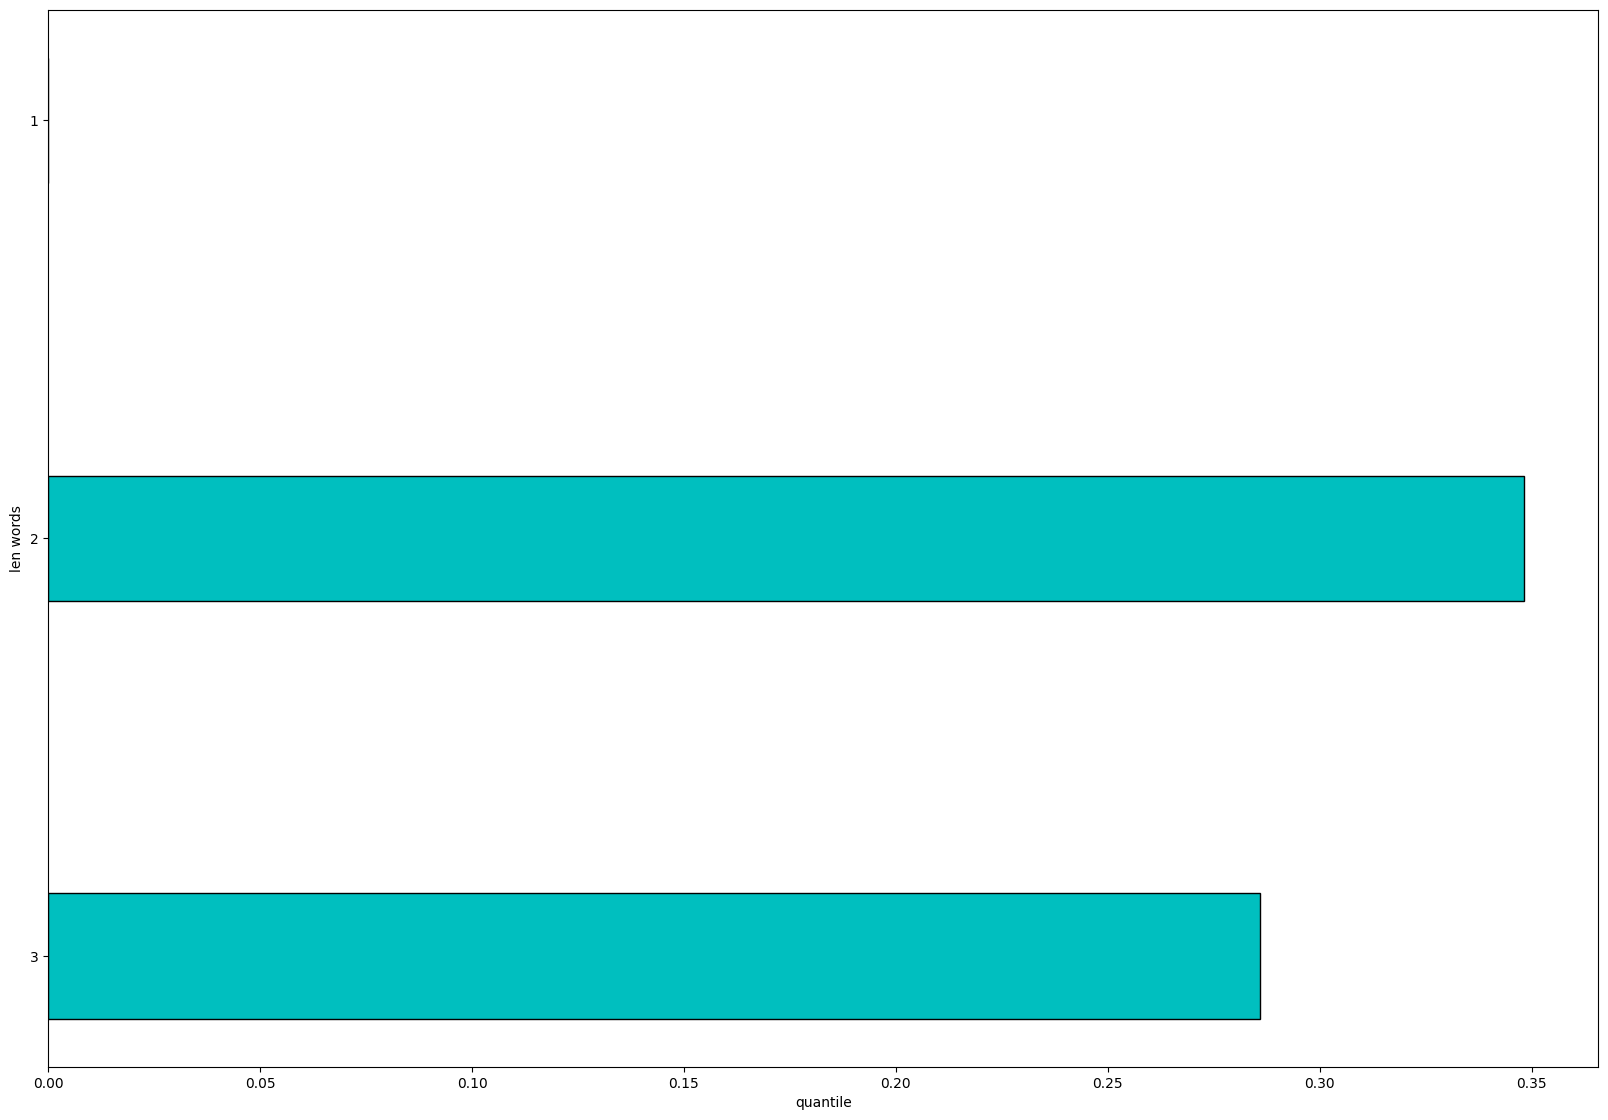

In [58]:
plt.figure(figsize=(20,14), dpi=100)
plt.barh(range(len(dict_of_mean)), list(reversed(dict_of_mean.values())), align='center', color='c',
            edgecolor='black', height=0.3)
plt.yticks(range(len(dict_of_mean)), list(reversed(dict_of_mean.keys())))
plt.xlabel("quantile")
plt.ylabel("len words")

plt.savefig("C:\\Users\\giuli\\Desktop\\image finale\\" + "ranking.png",
                bbox_inches='tight')

